### Condução 1D 

- Barra de 4cm;
- T(0) = 0°C
- T(n) = convecção
- k = 28 W/m.k
- e = 5.10**6


In [349]:

import numpy as np

L = 0.04 # m
e = 5 * (10**6)     # geração de energia
k = 28              # coeficiente de condução
h = 45              # coef. convectivo
Tc = 30             # temp. convecção
n = 1000            # números de nós
dx = L / (n-1)      # tamanho dos espaços

T = np.zeros(n)
X = np.linspace(0,L,n)

T[0] = 0            # temperatura inical

#print(T,X,dx)


### Aplicando as condições de contorno e calculando a convecção

In [350]:
const = e*dx**2/k 

const_conveccao = (-h*dx*Tc/k) - (e*dx**2/(2*k))

const_Tn = -(1 + h*dx/k)

print(const,const_conveccao,const_Tn)

0.0002862865725728588 -0.00207364521678836 -1.00006435006435


### Criando o sistema linear

In [351]:
Z = np.meshgrid(np.zeros(n),np.zeros(n-1))[0] # coluna, linha

# cria a matriz do problema 
for i in range(n-1):
    for j in range(n):
        if i == j:
            Z[i][j] = 2
            
        elif j - 1 == i:
            Z[i][j] = -1
        
        elif i - 1 == j:
            Z[i][j] = -1
            
# aplicando as condições de contorno e convecção
Z[0][-1] = const + T[0]
Z[-1][-1] = const_conveccao
Z[-1][-2] = const_Tn
Z[-1][-3] = 1

for i in range(n-2):
    if i > 0:
        Z[i][-1] = const

#print(Z)

### Zerar a parte de baixo da matriz

In [352]:
for i in range(n-1):
    
    aux = Z[i][i]
    for j in range(n):
        Z[i][j] = Z[i][j] / aux
        
    if n-2 == i:
        break
    elif n-3 == i:
        Z[i+1] = Z[i+1] - Z[i] 
    else:
        Z[i+1] = Z[i+1] + Z[i] 
        
#print(Z)

### Zerar a parte de cima da matriz

In [353]:
for i in range(-2,-(n-1)-1,-1):
    aux = Z[i][i]
    Z[i] = Z[i] - aux * Z[i+1]
    
#print(Z)

In [354]:
for i,lista in enumerate(Z,1):  
    T[i] = abs(lista[-1])
    
print(T)

[  0.           0.27903344   0.5577806    0.83624147   1.11441606
   1.39230436   1.66990637   1.94722209   2.22425153   2.50099468
   2.77745155   3.05362213   3.32950642   3.60510443   3.88041615
   4.15544158   4.43018073   4.70463358   4.97880016   5.25268044
   5.52627444   5.79958216   6.07260358   6.34533872   6.61778758
   6.88995014   7.16182642   7.43341642   7.70472012   7.97573755
   8.24646868   8.51691353   8.78707209   9.05694436   9.32653035
   9.59583005   9.86484347  10.13357059  10.40201143  10.67016599
  10.93803426  11.20561624  11.47291193  11.73992134  12.00664447
  12.2730813   12.53923185  12.80509611  13.07067409  13.33596578
  13.60097118  13.8656903   14.13012312  14.39426967  14.65812992
  14.92170389  15.18499158  15.44799297  15.71070808  15.97313691
  16.23527944  16.49713569  16.75870566  17.01998933  17.28098673
  17.54169783  17.80212265  18.06226118  18.32211342  18.58167938
  18.84095905  19.09995243  19.35865953  19.61708034  19.87521487
  20.13306

### Plota o gráfico

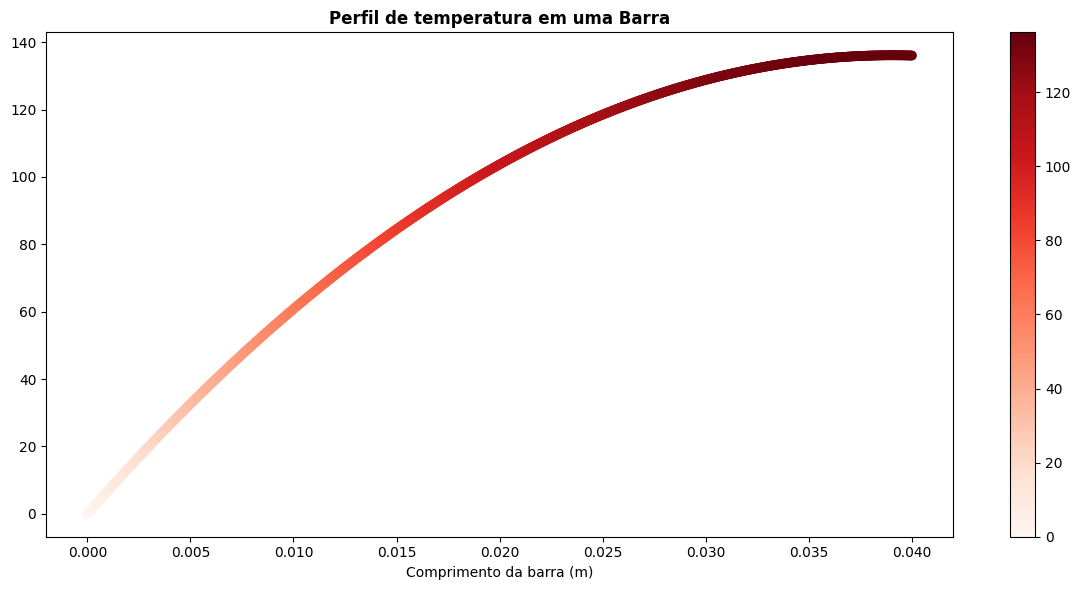

In [355]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6),tight_layout=True)
plt.scatter(X,T,marker='o',c=T,cmap='Reds')
plt.colorbar()
#plt.yticks([])
plt.xlabel('Comprimento da barra (m)')
plt.title('Perfil de temperatura em uma Barra',weight='bold');